In [1]:
import numpy as np
import pandas as pd
#For plotting
import matplotlib.pyplot as plt
import seaborn as sns
#For modeling
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

### &#9989; Noah Lee

# World Happiness Report: Over the years

## Background and Motivation ##
Dataset source: https://www.kaggle.com/datasets/unsdsn/world-happiness

The **World Happiness Report** is an annual survey conducted by the [*Sustainable Development Solutions Network*](https://www.unsdsn.org/), which is a non-profit that works under the United Nations. The topic of the survey is to determine a country's ranking in terms of a `Happiness Score`. This `Happiness Score` is determined by features such as:
1. Economy (GDP)
1. Family
1. Health
1. and more (See Kaggle link for full list, or continue to see in the code blocks below)

For this project, I worked with the survey results of the years from 2015 to 2019. The goals of my analysis were to:
1. Determine which feature was the strongest correlated with a country's `Happiness Score`
1. Use past happiness score data to predict a score in the subsequent year (2020)

## Methodology ##
### Part 1: Loading the data ###
There are 5 datasets, each for a year between, and including, 2015-2019.

In [2]:
#Load the data
df15 = pd.read_csv('2015.csv')
df16 = pd.read_csv('2016.csv')
df17 = pd.read_csv('2017.csv')
df18 = pd.read_csv('2018.csv')
df19 = pd.read_csv('2019.csv')

In [3]:
print(df15.shape)
df15.head()

(158, 12)


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
print(df16.shape)
df16.head()

(157, 13)


,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [5]:
print(df17.shape)
df17.head()

(155, 12)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [6]:
print(df18.shape)
df18.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


In [7]:
print(df19.shape)
df19.head()

(156, 9)


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


### Part 2: Cleaning the data ###
Between each year's dataset there appears to be inconsistent dimension sizes where some datasets have more columns and/or rows than other(s). Also, some columns are titled differently, but contain the same information. For simplicity, I would like to keep each dataset to have the same countries and columns studied.
#### Part 2.1: Removing unnecessary features + Renaming columns ####
After taking a look at the data, I noticed that some features don't appear to be important in determining a happiness score (confidence intervals, errors) The author of the dataset also noted that the feature `Dystopia Residual` (or similarily titled) is really just the sum of other unexplained factors and not present in all the datasets, so I will remove this as well. Also, the columns between datasets are not always titled the same, so I will have to rename them appropriately.

In [8]:
df15 = df15.drop(['Standard Error', 'Dystopia Residual'], axis=1) #Remove these
df15 = df15.rename(columns={"Economy (GDP per Capita)":'Economy',
                            'Health (Life Expectancy)':'Health', 
                            'Trust (Government Corruption)':'Trust'}, errors="raise") #Rename these
print(df15.shape) #Dimension
df15.head()

(158, 10)


,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
df16 = df16.drop(columns=['Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'])
df16 = df16.rename(columns={"Economy (GDP per Capita)":'Economy',
                            'Health (Life Expectancy)':'Health', 
                            'Trust (Government Corruption)':'Trust'}, errors="raise")
print(df16.shape)
df16.head()

(157, 10)


,Country,Region,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Trust,Generosity
0,Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171
1,Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083
2,Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678
3,Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895
4,Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492


In [10]:
df17 = df17.drop(columns=['Whisker.high', 'Whisker.low', 'Dystopia.Residual'])
df17 = df17.rename(columns={"Happiness.Rank":'Happiness Rank',
                           'Happiness.Score':'Happiness Score',
                           'Economy..GDP.per.Capita.':'Economy',
                           'Health..Life.Expectancy.':'Health',
                           'Trust..Government.Corruption.':'Trust'}, errors="raise")
print(df17.shape)
df17.head() #I will need to add a "Region" feature later

(155, 9)


,Country,Happiness Rank,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust
0,Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964
1,Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770
2,Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527
3,Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007
4,Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612


`df17` is missing a region column.

In [11]:
df18 = df18.rename(columns={"Country or region":'Country',
                            'Overall rank':'Happiness Rank',
                           'Score':'Happiness Score',
                           'GDP per capita': 'Economy',
                           'Social support':'Family',
                           'Healthy life expectancy':'Health',
                           'Freedom to make life choices':'Freedom',
                            'Perceptions of corruption':'Trust'}, errors="raise")
print(df18.shape)
df18.head()

(156, 9)


,Happiness Rank,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


`df18` is also missing a region column.

In [12]:
df19 = df19.rename(columns={"Country or region":'Country',
                            'Overall rank':'Happiness Rank',
                           'Score':'Happiness Score',
                           'GDP per capita': 'Economy',
                           'Social support':'Family',
                           'Healthy life expectancy':'Health',
                           'Freedom to make life choices':'Freedom',
                            'Perceptions of corruption':'Trust'}, errors="raise")
print(df19.shape)
df19.head()

(156, 9)


,Happiness Rank,Country,Happiness Score,Economy,Family,Health,Freedom,Generosity,Trust
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


`df19` is also missing a region column.

#### Looking Back ####
**df19** and **df18** are missing a `Region` column. Besides that, the column names are now all consistently spelled and capitalized. However, the row dimensions are still not the same.

#### Part 2.2: Consistent countries
As noted above, it appears that not every country per year was scored, as seen by the inconsistent number of rows per table over the years. I decided to focus on the countries only present in all the reports between 2015-2019. To do so, I first narrowed down the datasets by focusing on what extra countries/regions were surveyed after the 2015 survey. Then, I gathered any extra countries in the 2015 survey to remove if they were not surveyed again consistently in the years that followed.  
Because I am using the 2015 dataset as a starting point, I started off with printing the countries studied in that year.

In [13]:
print(list(df15.Country)) #The countries reported in 2015

['Switzerland', 'Iceland', 'Denmark', 'Norway', 'Canada', 'Finland', 'Netherlands', 'Sweden', 'New Zealand', 'Australia', 'Israel', 'Costa Rica', 'Austria', 'Mexico', 'United States', 'Brazil', 'Luxembourg', 'Ireland', 'Belgium', 'United Arab Emirates', 'United Kingdom', 'Oman', 'Venezuela', 'Singapore', 'Panama', 'Germany', 'Chile', 'Qatar', 'France', 'Argentina', 'Czech Republic', 'Uruguay', 'Colombia', 'Thailand', 'Saudi Arabia', 'Spain', 'Malta', 'Taiwan', 'Kuwait', 'Suriname', 'Trinidad and Tobago', 'El Salvador', 'Guatemala', 'Uzbekistan', 'Slovakia', 'Japan', 'South Korea', 'Ecuador', 'Bahrain', 'Italy', 'Bolivia', 'Moldova', 'Paraguay', 'Kazakhstan', 'Slovenia', 'Lithuania', 'Nicaragua', 'Peru', 'Belarus', 'Poland', 'Malaysia', 'Croatia', 'Libya', 'Russia', 'Jamaica', 'North Cyprus', 'Cyprus', 'Algeria', 'Kosovo', 'Turkmenistan', 'Mauritius', 'Hong Kong', 'Estonia', 'Indonesia', 'Vietnam', 'Turkey', 'Kyrgyzstan', 'Nigeria', 'Bhutan', 'Azerbaijan', 'Pakistan', 'Jordan', 'Montene

#### Extra countries in the non-2015 data
Below, the `not_in_2015` function will take in **df15** (the 2015 dataset) and a **dfXX** (a dataset of the year 20XX). This function will then return a list of countries that are present in the year XX's data, but not in the 2015 survey.

In [14]:
#Function that takes the df15 and dfXX dataframes
def not_in_2015(df15, dfxx):
    extras = [] #List of countries in the 20XX dataset, NOT present in the 2015
    for i in list(dfxx.Country): #For each country in the 20XX data...
        if i not in list(df15.Country): #...if the country names is not in the 2015 data...
            extras.append(i) #then add the country
    return extras #Returns a list of the countries present in 20XX data, but not in 2015

In [15]:
extra2016 = not_in_2015(df15, df16) #2016 data
extra2016

['Puerto Rico',
 'Belize',
 'Somalia',
 'Somaliland Region',
 'Namibia',
 'South Sudan']

In [16]:
extra2017 = not_in_2015(df15, df17) #2017 data
extra2017

['Taiwan Province of China',
 'Belize',
 'Hong Kong S.A.R., China',
 'Somalia',
 'Namibia',
 'South Sudan']

In the 2017 data, it appears that Taiwan and Hong Kong were labeled a different name.

In [17]:
extra2018 = not_in_2015(df15, df18) #2018 data
extra2018

['Trinidad & Tobago',
 'Belize',
 'Northern Cyprus',
 'Somalia',
 'Namibia',
 'South Sudan']

In [18]:
extra2019 = not_in_2015(df15, df19) #2019 data
extra2019

['Trinidad & Tobago',
 'Northern Cyprus',
 'North Macedonia',
 'Somalia',
 'Namibia',
 'Gambia',
 'South Sudan']

Below, I have the total list of unique countries in the 20XX reports, but not in the 2015 report.

In [19]:
#Create a set composed of the extra countries/regions
extra_all = extra2016 + extra2017 + extra2018 + extra2019 #First, create a list of all the extras
extra_all = set(extra_all) #Convert the list into a set, to only get the unique values
extra_all

{'Belize',
 'Gambia',
 'Hong Kong S.A.R., China',
 'Namibia',
 'North Macedonia',
 'Northern Cyprus',
 'Puerto Rico',
 'Somalia',
 'Somaliland Region',
 'South Sudan',
 'Taiwan Province of China',
 'Trinidad & Tobago'}

#### Countries reported in 2015, but not in the others
Below is the `only_in_2015` function. It works similar to the `not_in_2015` function, except it does the opposite. In other words, the function will return a list of countries that were recorded in the 2015 survey, but were not followed up with in the survey for year 20XX.

In [20]:
def only_in_2015(df15, dfxx):
    only2015 = [] #List of countries only in the 2015 data and not in the 20XX data in question
    for i in list(df15.Country):
        if i not in list(dfxx.Country):
            only2015.append(i)
    return only2015 #returns list of the countries in the 2015 data, but not in the 20XX data

In [21]:
not2016 = only_in_2015(df15, df16) #2016 data
not2016

['Oman',
 'Somaliland region',
 'Mozambique',
 'Lesotho',
 'Swaziland',
 'Djibouti',
 'Central African Republic']

In [22]:
not2017 = only_in_2015(df15, df17) #2017 data
not2017

['Oman',
 'Taiwan',
 'Suriname',
 'Hong Kong',
 'Somaliland region',
 'Laos',
 'Swaziland',
 'Djibouti',
 'Comoros']

In [23]:
not2018 = only_in_2015(df15, df18) #2018 data
not2018

['Oman',
 'Suriname',
 'Trinidad and Tobago',
 'North Cyprus',
 'Somaliland region',
 'Swaziland',
 'Djibouti',
 'Comoros']

In [24]:
not2019 = only_in_2015(df15, df19) #2019 data
not2019

['Oman',
 'Suriname',
 'Trinidad and Tobago',
 'North Cyprus',
 'Somaliland region',
 'Macedonia',
 'Sudan',
 'Djibouti',
 'Angola']

In [25]:
not_all = not2016 + not2017 + not2018 + not2019
not_all = set(not_all)
not_all

{'Angola',
 'Central African Republic',
 'Comoros',
 'Djibouti',
 'Hong Kong',
 'Laos',
 'Lesotho',
 'Macedonia',
 'Mozambique',
 'North Cyprus',
 'Oman',
 'Somaliland region',
 'Sudan',
 'Suriname',
 'Swaziland',
 'Taiwan',
 'Trinidad and Tobago'}

#### What did I find?? ####
1. In the 2017 data, it appears that *Taiwan* and *Hong Kong* were labeled a different name ("Taiwan Province of China" and "Hong Kong S.A.R., China", respectively)
2. *North Cyprus* and *Northern Cyprus* are the same thing. I will have to set a consistent spelling.
3. *Trinidad and Tobago* and *Trinidad & Tobago*. Another case of a spelling difference.
4. *Macedonia* and *North Macedonia* are the same thing. The country changed its name from the first to the latter in 2019.
5. Otherwise, the other countries appear to not be collected in all 4 years.

On a side note, it appears that the survey gave scores to some unofficial countries. Just from looking above:
* *Taiwan* is not officially recognized by most modern countries
* *Hong Kong* had some autonomy at the time of the survey being published, but is not a true country
* *Northern Cyprus* is a disputed break-away state from the island country of *Cyprus*, proper.

In addition, among the "countries" that I will later remove from the datasets include:
* *Puerto Rico*, which is a territory of the *United States*
* *Somaliland Region*, a break-away state from *Somalia*

#### Cleaning row names ####
Following the observations directly above this text block, I will start off by setting a consistent spelling, punctuation, and capitalization for the countries in observations 1-3.

In [47]:
#For the 2016, 2017, 2018, 2019 data, I will have to set a consistent spelling for:
#North Cyprus
#Trinidad and Tobago
#Taiwan
#Hong Kong
#Macedonia, all based from how 2015 data has them spelled
def edit_the_4(dfXX):
    for i in range(len(dfXX.Country)):
        if dfXX['Country'].iloc[i,] == 'Trinidad & Tobago':
            dfXX['Country'].iloc[i,] = 'Trinidad and Tobago' #2015 data had this spelling
        if dfXX['Country'].iloc[i,] == 'Northern Cyprus':
            dfXX['Country'].iloc[i,] = 'North Cyprus' #2015 data had this spelling
        if dfXX['Country'].iloc[i,] == 'Taiwan Province of China':
            dfXX['Country'].iloc[i,] = 'Taiwan' #2015 data had this spelling
        if dfXX['Country'].iloc[i,] == 'Hong Kong S.A.R., China':
            dfXX['Country'].iloc[i,] = 'Hong Kong' #2015 data had this spelling
        if dfXX['Country'].iloc[i,] == 'North Macedonia':
            dfXX['Country'].iloc[i,] = 'Macedonia' #2015 data had this spelling
    return dfXX

df16 = edit_the_4(df16)
df17 = edit_the_4(df17)
df18 = edit_the_4(df18)
df19 = edit_the_4(df19)

#Re-run this code block to get ride of the error message, which we can ignore.

In [27]:
masters = list(extra_all) + list(not_all) #Complete list of the countries that are not studied in all the years
masters = set(masters) #Turn list into a set to remove duplicate values

#List of countries that were in the sets above, but we have now fixed
the_fixed = ['Trinidad & Tobago', 'Trinidad and Tobago', 'Northern Cyprus', 'North Cyprus', 
             'Taiwan Province of China', 'Taiwan', 'Hong Kong S.A.R., China', 'Hong Kong', 'North Macedonia', 'Macedonia']

masters = masters - set(the_fixed) #Remove the inconsistent spellings of previous
masters = list(masters)
masters #List of countries that we need to remove

['Mozambique',
 'Somaliland Region',
 'Sudan',
 'Suriname',
 'Central African Republic',
 'Oman',
 'Somaliland region',
 'Swaziland',
 'South Sudan',
 'Somalia',
 'Namibia',
 'Belize',
 'Djibouti',
 'Laos',
 'Comoros',
 'Puerto Rico',
 'Gambia',
 'Angola',
 'Lesotho']

In [28]:
#Function to remove all the countries from the masters list. These countries are the ones that were
# not consistently ranked/studied over the years
def remove_the_row(dfXX, masters):
    indices = [] #List of numerical indices that contain a country we don't want
    for i in range(len(dfXX.Country)): #Loop down by number
        if dfXX['Country'].iloc[i,] in masters: #If country name is in the list...
            indices.append(i) #Add the index value
    dfXX = dfXX.drop(dfXX.index[indices]) #Drop the indices
    return dfXX

#Edit the dataframes
df15 = remove_the_row(df15, masters)
df16 = remove_the_row(df16, masters)
df17 = remove_the_row(df17, masters)
df18 = remove_the_row(df18, masters)
df19 = remove_the_row(df19, masters)

#Compare the sorted lists of each df's country values. Are they all the same??
print(sorted(list(df15.Country)) == sorted(list(df16.Country)))
print(sorted(list(df16.Country)) == sorted(list(df17.Country)))
print(sorted(list(df17.Country)) == sorted(list(df18.Country)))
print(sorted(list(df18.Country)) == sorted(list(df19.Country)))

True
True
True
True


#### Part 2.3: Adding a column for `Region` for the ones missing it
Datasets for 2017-2019 are missing the mentioned column. To be consistent, I will add this.

In [29]:
#First, get the list of unique regions in 2015
regions = list(df15.Region.unique())

#Create a list per region to store countries in
we = [] #Western Europe
na = [] #North America
anz = [] #Australia and New Zealand
mena = [] #Middle East and Northern Africa
lac = [] #Latin America and Caribbean
sea = [] #Southeastern Asia
cee = [] #Central and Eastern Europe
ea = [] #Eastern Asia
ssa = [] #Sub-Saharan Africa
sa = [] #Southern Asia

#Go down the country list, and add the country to the associated region in the 2015 dataset
for index in range(len(df15.Country)):
    if df15['Region'].iloc[index,] == 'Western Europe':
        we.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'North America':
        na.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'Australia and New Zealand':
        anz.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'Middle East and Northern Africa':
        mena.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'Latin America and Caribbean':
        lac.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'Southeastern Asia':
        sea.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'Central and Eastern Europe':
        cee.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'Eastern Asia':
        ea.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'Sub-Saharan Africa':
        ssa.append(df15['Country'].iloc[index,])
    elif df15['Region'].iloc[index,] == 'Southern Asia':
        sa.append(df15['Country'].iloc[index,])    

In [30]:
#Function that takes a dataframe dfXX, will return dfXX with an updated or new region column
def region_edit(dfXX):
    region_col = []
    for country in dfXX.Country:
        if country in we:
            region_col.append('Western Europe')
        elif country in na:
            region_col.append('North America')
        elif country in anz:
            region_col.append('Australia and New Zealand')
        elif country in mena:
            region_col.append('Middle East and Northern Africa')
        elif country in lac:
            region_col.append('Latin America and Caribbean')
        elif country in sea:
            region_col.append('Southeastern Asia')
        elif country in cee:
            region_col.append('Central and Eastern Europe')
        elif country in ea:
            region_col.append('Eastern Asia')
        elif country in ssa:
            region_col.append('Sub-Saharan Africa')
        elif country in sa:
            region_col.append('Southern Asia')
    return region_col

df16['Region'] = region_edit(df16) #Even though df16 has this column already, no harm in double-checking to make sure
                                    #everything is consistent
df17['Region'] = region_edit(df17)
df18['Region'] = region_edit(df18)
df19['Region'] = region_edit(df19)

In [31]:
print(df15.shape); print(df16.shape); print(df17.shape); print(df18.shape); print(df19.shape)

(146, 10)
(146, 10)
(146, 10)
(146, 10)
(146, 10)


The columns are now all consistently spelled and chosen. The countries per dataset are all consistnely spelled and studied.  
Now I am ready to do the actual analysis and modeling.

### Part 3: Analysis ###
#### Part 3.1: What factors make a country happy? ####
A way to get an idea on relationships between variables is by using a correlation matrixo. Below are heatmaps that will show such correlation relationships per year.

<Axes: title={'center': 'Correlation for 2015'}>

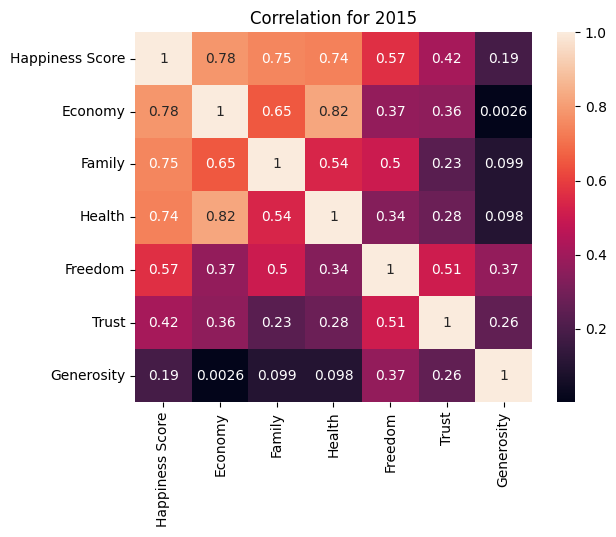

In [32]:
df15_num = df15.iloc[:,3:10]
plt.title('Correlation for 2015')
sns.heatmap(df15_num.corr(), annot=True)

It appears that for the year 2015, the feature `Economy` had the strongest correlation with `Happiness Score` at 0.78. The weakest feature is `Generosity`, at 0.18.

<Axes: title={'center': 'Correlation for 2016'}>

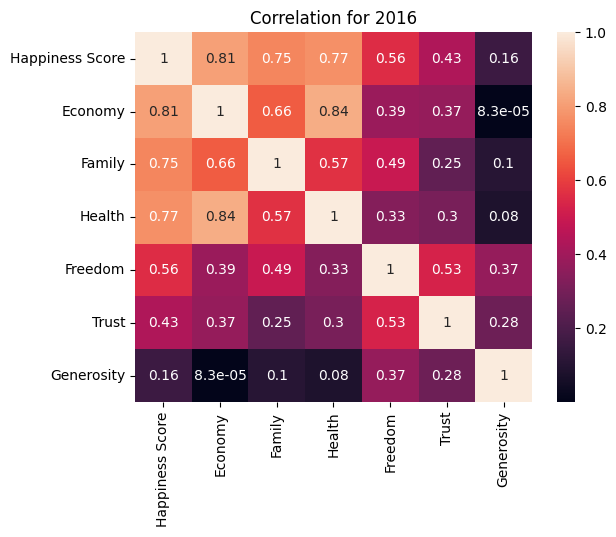

In [33]:
df16_num = df16.iloc[:,3:10]
plt.title('Correlation for 2016')
sns.heatmap(df16_num.corr(), annot=True)

It appears that for the year 2016, the feature `Economy` had the strongest correlation with `Happiness Score` at 0.81. The weakest feature is `Generosity`, at 0.16.

<Axes: title={'center': 'Correlation for 2017'}>

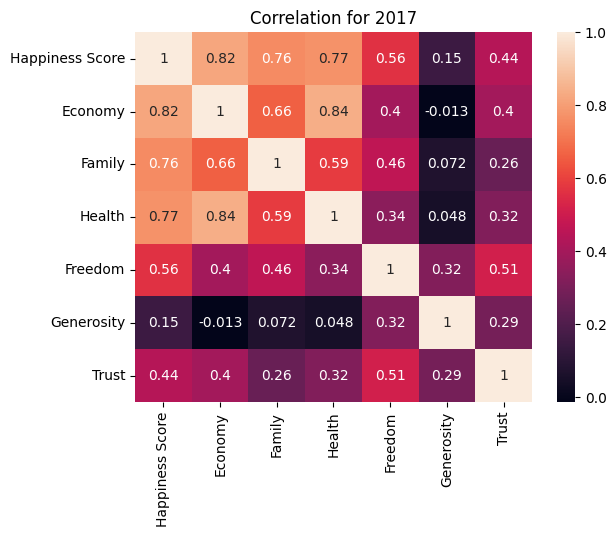

In [34]:
df17_num = df17.iloc[:,2:9]
plt.title('Correlation for 2017')
sns.heatmap(df17_num.corr(), annot=True)

It appears that for the year 2017, the feature `Economy` had the strongest correlation with `Happiness Score` at 0.82. The weakest feature is `Generosity`, at 0.15.

<Axes: title={'center': 'Correlation for 2018'}>

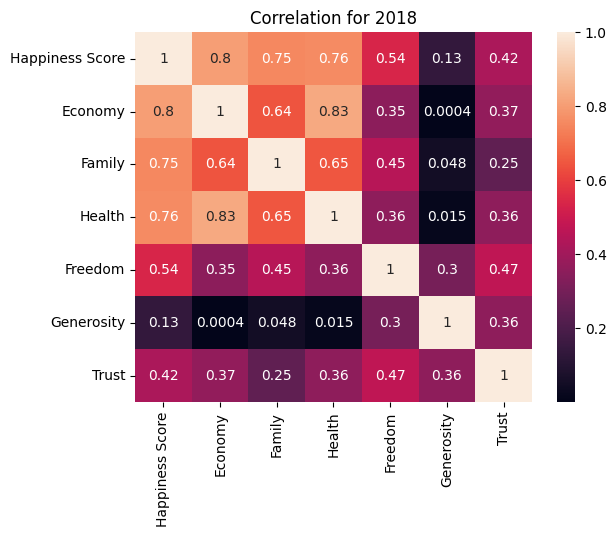

In [35]:
df18_num = df18.iloc[:,2:9]
plt.title('Correlation for 2018')
sns.heatmap(df18_num.corr(), annot=True)

It appears that for the year 2018, the feature `Economy` had the strongest correlation with `Happiness Score` at 0.8. The weakest feature is `Generosity`, at 0.13.

<Axes: title={'center': 'Correlation for 2019'}>

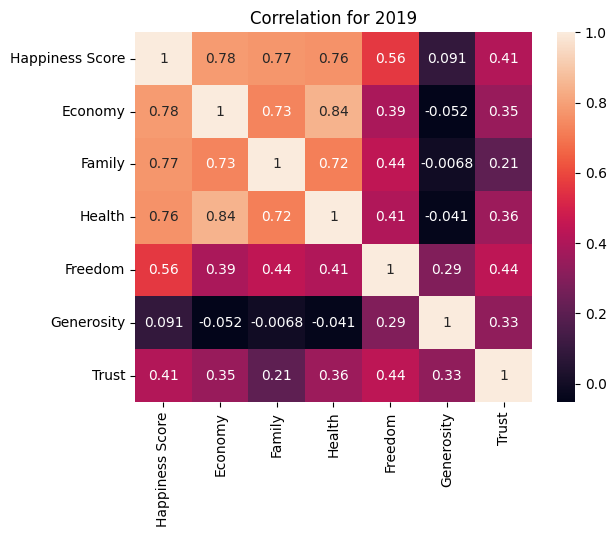

In [36]:
df19_num = df19.iloc[:,2:9]
plt.title('Correlation for 2019')
sns.heatmap(df19_num.corr(), annot=True)

It appears that for the year 2019, the feature `Economy` had the strongest correlation with `Happiness Score` at 0.79. The weakest feature is `Generosity`, at 0.0091.

##### Conclusion 1:
For all the years, the variable `Economy` had the strongest correlation with a country's `Happiness Score`. The opposite goes for the feature `Generosity`. Both correlations are positive, so this implies that a wealthier nation is more likely to be happier. This also implies that how generous a country's population is (likely to give, donate, help another out, etc.) is not something that will factor much in the final score.

#### A visual relationship between `Economy` and `Happiness Score`
Because a country's `Economy` score was the highest correlated, I decided to plot this feature against a country's `Happiness Score`.

In [37]:
df_all = pd.concat([df15,df16,df17,df18,df19]) #A dataset that includes all the countries across the years

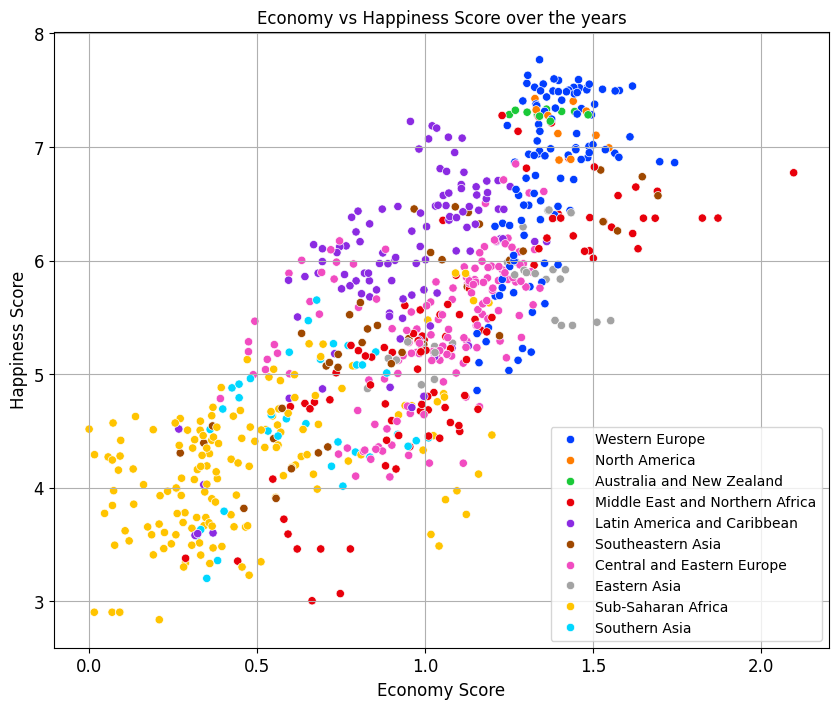

In [38]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df_all, x='Economy', y='Happiness Score', hue='Region', palette='bright')
plt.tick_params(labelsize=12)
plt.grid()
plt.xlabel('Economy Score', fontsize=12)
plt.ylabel('Happiness Score', fontsize=12)
plt.title('Economy vs Happiness Score over the years')
plt.legend(fontsize="10")
plt.show()

There appears to be a clear positive relationship between the 2 features. You can also see that certain regions tend to have higher/lower scores in both variables (for example *Western Europe*  is generally in the top-right, while *Sub-Saharan Africa* is more populated in teh bottom-left).

### Predict a region's average score in 2020 using `curve_fit` ###
At this point, I realized that plotting a model for each country is too much work. Instead, I decided to create a model to predict each region's happiness score in a latter year.

In [39]:
# Function that will take in a dataset and a string labelling a year
# Will find the average happiness score per region for the given year's dataset
# Outputs a pandas df
def average_score_per_region_per_year(dfXX, year):
    scores_and_regions = dfXX.groupby(['Region'])['Happiness Score'].mean() #Gather happiness score per region, find the mean
    newdf = pd.DataFrame(scores_and_regions).T
    newdf.index=year
    return newdf

#Named compXX becuase it is a 'compilation' of the average years. Honestly I don't know if I'm using that word right but meh
comp15 = average_score_per_region_per_year(df15, ['2015'])
comp16 = average_score_per_region_per_year(df16, ['2016'])
comp17 = average_score_per_region_per_year(df17, ['2017'])
comp18 = average_score_per_region_per_year(df18, ['2018'])
comp19 = average_score_per_region_per_year(df19, ['2019'])

#Combined dataframe of the average yearly scores per reigon
annual_ave = pd.concat([comp15,comp16, comp17, comp18, comp19]).reset_index()
annual_ave = annual_ave.rename(columns={'index':'Year'}, errors="raise")
annual_ave

Region,Year,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
0,2015,7.2850,5.332931,5.626167,6.138762,5.330789,7.2730,5.372625,4.580857,4.120419,6.689619
1,2016,7.3235,5.370690,5.624167,6.056095,5.386053,7.2540,5.396750,4.563286,4.074839,6.685667
2,2017,7.2990,5.409931,5.646667,5.957905,5.369684,7.1545,5.444875,4.628429,4.131129,6.703714
3,2018,7.2980,5.463966,5.672000,5.949857,5.282737,7.1070,5.399750,4.603857,4.247968,6.781762
4,2019,7.2675,5.561517,5.688833,5.954429,5.237000,7.0850,5.333375,4.526857,4.380323,6.842190


Below, I plotted each region's score per year.

Text(0.5, 1.0, 'Average Happiness Score per Year')

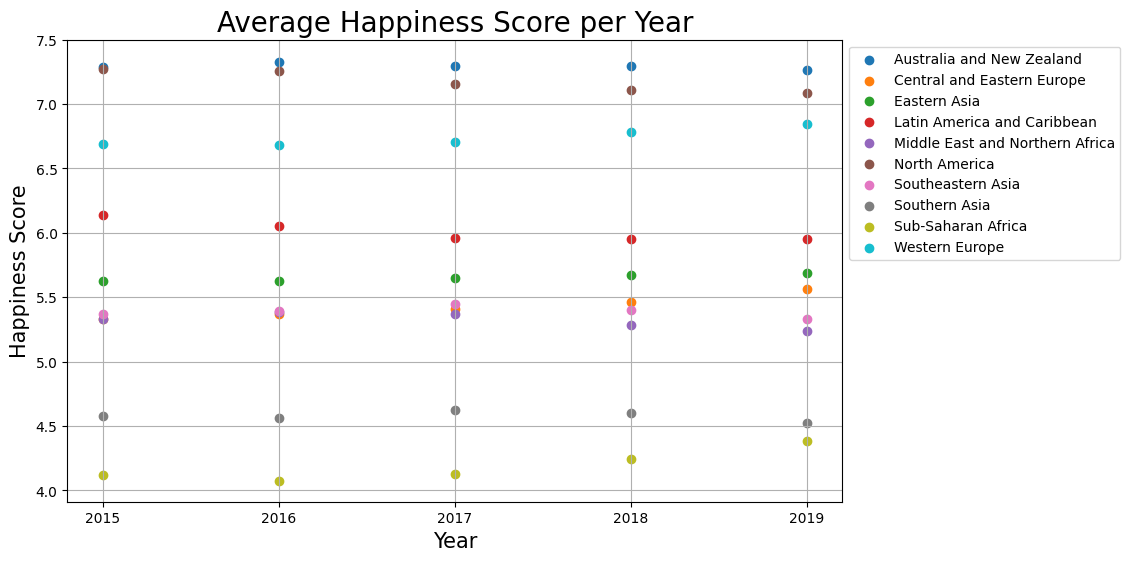

In [40]:
plt.figure(figsize=(10,6))

for region in annual_ave.iloc[:,1:]: #Plot the scatterplots
    plt.scatter(annual_ave.Year, annual_ave[region], label=region)
plt.yticks(np.arange(4,8,0.5))
plt.grid()
plt.legend(bbox_to_anchor=(1, 1)) #Get the legend OUTTA the way!!!!
plt.xlabel('Year', size=15)
plt.ylabel('Happiness Score', size=15)
plt.title('Average Happiness Score per Year', size=20)

In [41]:
#Using code from Day14, I will use a linear and quadratic model to determine which is best used for a region
def straight_line(x,A,B):
    return (A*x)+B

def quad_line(x,A,B,C):
    return (A*x**2) + B*x + C

In [42]:
def comparison(annual_ave):
    #Earlier, I set the year column as strings, so I have to turn them into ints
    years = []
    for year in annual_ave.Year:
        temp_year = int(year)
        years.append(temp_year)
    years = np.array(years)
    
    model_mse = np.array(['Region', 'Linear MSE', 'Quadratic MSE']) #Array to store data
    
    for region in annual_ave.iloc[:,1:]:
        
        #Gather data per region
        region_scores = []
        for score in annual_ave[region]:
            temp_score = float(score)
            region_scores.append(temp_score)
        region_scores = np.array(region_scores)
    
        #Linear Model
        optimal_l, pcovs = curve_fit(straight_line, years, region_scores)
        expectedA_l = optimal_l[0]
        expectedB_l = optimal_l[1]
        linear_mod = straight_line(years,expectedA_l, expectedB_l)

        #Quadratic Model
        optimal_q, pcov_q = curve_fit(quad_line, years, region_scores)
        expectedA_q = optimal_q[0]
        expectedB_q = optimal_q[1]
        expectedC_q = optimal_q[2]
        quad_mod = quad_line(years,expectedA_q, expectedB_q, expectedC_q)
    
        #Get the MSE values
        linear_mse = mean_squared_error(region_scores, linear_mod)
        quad_mse = mean_squared_error(region_scores, quad_mod)
        
        
        new = [region, linear_mse, quad_mse] #Array that contains the region name, linear mse, quadratic mse
        model_mse = np.vstack([model_mse, new])
    return model_mse

`mse_averages` is a dataframe that contains the MSE per model-type (linear or quadratic) per region.

In [43]:
mse_averages = pd.DataFrame(comparison(annual_ave))
header = mse_averages.iloc[0]
mse_averages.columns = header
mse_averages = mse_averages.drop(mse_averages.index[0])
mse_averages

,Region,Linear MSE,Quadratic MSE
1,Australia and New Zealand,0.00026533504364025445,7.804564398570285e-05
2,Central and Eastern Europe,0.00029398532416993956,3.6016776499519064e-05
3,Eastern Asia,4.5517340605577134e-05,2.2085058365869954e-05
4,Latin America and Caribbean,0.0011120541360072583,0.00011172248215480039
5,Middle East and Northern Africa,0.0013511209591877053,0.00028970289098800145
6,North America,0.00032717993835447944,0.0002969514094851475
7,Southeastern Asia,0.001217753792266857,0.00014328144110735977
8,Southern Asia,0.001112386746128645,0.0004909291462252179
9,Sub-Saharan Africa,0.002626398037852367,0.00014918248400934758
10,Western Europe,0.0005786018369783565,6.958698132275605e-05


Which model is best suited for a region? This can be solved by comparing the MSEs for each region. A smaller MSE implies a stronger and better correlation.

In [44]:
for row in range(len(mse_averages.Region)):
    if mse_averages['Linear MSE'].iloc[row] < mse_averages['Quadratic MSE'].iloc[row]:
        print("Linear model is best for", mse_averages['Region'].iloc[row])
    else:
        print("Quadratic model is best for", mse_averages['Region'].iloc[row])

Linear model is best for Australia and New Zealand
Linear model is best for Central and Eastern Europe
Quadratic model is best for Eastern Asia
Quadratic model is best for Latin America and Caribbean
Quadratic model is best for Middle East and Northern Africa
Quadratic model is best for North America
Quadratic model is best for Southeastern Asia
Quadratic model is best for Southern Asia
Quadratic model is best for Sub-Saharan Africa
Linear model is best for Western Europe


So it appears that not one model type is best suited for all regions. Thus, I will plot one of each type, specifically that for `Western Europe` for the linear, and `Southeastern Asia` for quadratic.

In [45]:
current_years  = np.arange(2015,2020,1) #Current years in the data
pred_years = np.arange(2015, 2021, 1) #Extra year to predict

#Function to get the scores as an array for curve_fit
def numpy_scores(name):
    #Here I am, once again having to turn all my pandas values into a numpy array to do the math...
    # Uhhhhh I guess I could've made this a numpy matrix from the start, but too late to go back now, huh?
    name_scores = []
    for score in annual_ave[name]:
        temp_score = float(score)
        name_scores.append(temp_score)
    name_scores = np.array(name_scores)
    return name_scores

we_scores = numpy_scores('Western Europe')
sea_scores = numpy_scores('Southeastern Asia')

Predicted 2020 average score for Western Europe: 6.860961903747423
Predicted 2020 avergae score for Southeastern Asia: 5.229697850139928


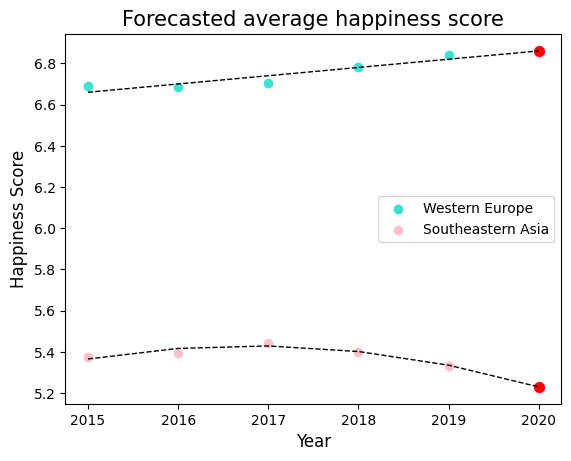

In [46]:
#Linear Model for Western Europe
optimal_l, pcov_sl = curve_fit(straight_line, current_years, we_scores)
expectedA_l = optimal_l[0]
expectedB_l = optimal_l[1]
#Predictions for 2020
we_pred = straight_line(pred_years, expectedA_l, expectedB_l)
print('Predicted 2020 average score for Western Europe:', we_pred[-1])

#Quadratic Model for Southeastern Asia
optimal_q, pcov_q = curve_fit(quad_line, current_years, sea_scores)
expectedA_q = optimal_q[0]
expectedB_q = optimal_q[1]
expectedC_q = optimal_q[2]
sea_pred = quad_line(pred_years, expectedA_q, expectedB_q, expectedC_q)
print('Predicted 2020 avergae score for Southeastern Asia:', sea_pred[-1])

#The fancy plot :O
plt.scatter(current_years, we_scores, label='Western Europe', color='turquoise')
plt.plot(pred_years, we_pred, color='black', linestyle='--', linewidth=1) #Fit
plt.scatter(current_years, sea_scores, label='Southeastern Asia', color='pink')
plt.plot(pred_years, sea_pred, color='black', linestyle='--', linewidth=1) #Fit
plt.legend()
plt.xlabel('Year', size=12)
plt.ylabel('Happiness Score', size=12)
plt.title('Forecasted average happiness score', size=15)
plt.scatter(2020, we_pred[-1], color='red', s=50) #prediction point
plt.scatter(2020, sea_pred[-1], color='red', s=50) #prediction point

## Results ##
At the start of the project, I wanted to try and answer these 2 questions:
1. Determine which feature was the strongest correlated with a country's `Happiness Score`
1. Use past happiness score data to predict a score in the subsequent year (2020)

The answers I found:
1. The feature `Economy` is most strongly correlated with `Happiness Score`
1. In the section right above, I used curve_fit to plot predicted trends for the `Happiness Score` for two regions.

Predicted 2020 average score for Western Europe: 6.860961903747423  
Predicted 2020 avergae score for Southeastern Asia: 5.229697850139928

## Discussion and Conclusion ##
**What did I learn?**
A country's economy (the GDP score) is the feature that correlates strongest with a country's overall happiness. I should note that this is just an observation, and that I did not prove a causation between the 2 factors.  
Assuming the current trend was to continue, the average person living in Western Europe is likely to be more happier in 2020, than in 2019. The opposite is true for the average person living in Southeastern Asia, as their region's average happiness score formula is heading downward.


**What could I do to improve this?**
I could have focused on predicting the happiness score for individual countries, rather than using the average of entire regions. A region's happiness score was computed by finding the average of the region's individual countries' happiness scores, so there can be some variation between the individual scores. Thus, maybe I could have worked on using the `curve_fit` function with certain countries surveyed, or all the countries in a chosen region.  
Earlier I chose to use heatmaps to determine which feature had the strongest correlation with happiness score. However, as stated above, this only shows a correlation, and not a causation. Perhaps a better way to solve this would be to perform a train-test split and create a regression model to determine which factors were strongest in predicting a score. Then, I could have tested the model by predicting the happiness score of countries that I removed during the data cleaning I performed in **Part 2** (Namibia in 2018, Angola in 2017, etc.). Maybe go further and gather the 2020 data from the survey's official website and apply the model to test even more countries.


**Other notes**
In 2020, the Covid pandemic happened, and it continued until about 2022. I imagine that my model's predictions for that year are probably over-estimating the scores.